In [1]:
import numpy as np
import pandas as pd
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Reshape, GRU, RNN
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings(action='ignore')

import math

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pickle
import gzip

# DATA 로드 및 EDA

In [2]:
# load and uncompress.
with gzip.open('3d_array.pickle','rb') as f:
    arr = pickle.load(f)

In [3]:
arr.shape

(7799, 690, 10)

In [4]:
label = np.load("3d_array_label.npy")

In [5]:
label.shape

(7799, 1)

In [6]:
label_2d = np.load("3d_array_label_2d.npy")

In [7]:
arr.sum()

771616.0

In [8]:
arr.sum()/(7799*690*10)

0.014338813411604237

In [16]:
arr1 = arr.reshape(arr.shape[0], arr.shape[2], arr.shape[1])
arr1.shape

(7799, 10, 690)

In [17]:
arr1[0,:,:].sum()

77.0

# 데이터 나누기

In [9]:
arr.shape[0] * 0.7

5459.299999999999

In [10]:
# 5500을 기준으로 split
X_train = arr[:5500,:,:]
y_train = label[:5500,:]
# y_train = label_2d[:5500,:]


X_test = arr[5500:,:,:]
y_test = label[5500:,:]
# y_test = label_2d[5500:,:]



X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5500, 690, 10), (5500, 1), (2299, 690, 10), (2299, 1))

In [11]:
label.sum()/7799

0.6122579817925375

In [12]:
#결측값 확인 - 없음
import math
a = [math.isnan(number) for number in label]
print(label[a].sum())

import math
a = [math.isnan(number) for number in arr.reshape(-1,1)]
arr.reshape(-1,1)[a].sum()

0


KeyboardInterrupt: 

# LSTM

In [13]:
lstm = Sequential()
lstm.add(LSTM(units=6, activation='sigmoid', input_shape=(arr.shape[1], arr.shape[2])))
lstm.add(Dense(units=1, activation='sigmoid'))
print(lstm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 408       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 415
Trainable params: 415
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
from keras.callbacks import EarlyStopping
# import tensorflow as tf
# from tensorflow import keras
# from keras import optimizers
# from keras.optimizers import SGD
# opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)

lstm.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['acc']) #loss='categorical_crossentropy'
# early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = lstm.fit(X_train, y_train, validation_split=0.25, batch_size=256, epochs=500)#,  callbacks=[early_stop])

Epoch 1/500
17/17 [==============================] - 15s 157ms/step - loss: 0.8157 - acc: 0.3000 - val_loss: 0.7423 - val_acc: 0.4218
Epoch 2/500
17/17 [==============================] - 2s 123ms/step - loss: 0.7825 - acc: 0.3032 - val_loss: 0.7285 - val_acc: 0.4218
Epoch 3/500
17/17 [==============================] - 2s 129ms/step - loss: 0.7600 - acc: 0.3011 - val_loss: 0.7168 - val_acc: 0.4218
Epoch 4/500
17/17 [==============================] - 2s 125ms/step - loss: 0.7376 - acc: 0.3058 - val_loss: 0.7064 - val_acc: 0.4218
Epoch 5/500
17/17 [==============================] - 2s 126ms/step - loss: 0.7177 - acc: 0.3063 - val_loss: 0.6976 - val_acc: 0.4218
Epoch 6/500
17/17 [==============================] - 2s 127ms/step - loss: 0.6994 - acc: 0.3484 - val_loss: 0.6905 - val_acc: 0.5782
Epoch 7/500
17/17 [==============================] - 2s 127ms/step - loss: 0.6819 - acc: 0.7054 - val_loss: 0.6853 - val_acc: 0.5782
Epoch 8/500
17/17 [==============================] - 2s 132ms/step -

17/17 [==============================] - 2s 119ms/step - loss: 0.6128 - acc: 0.6976 - val_loss: 0.7146 - val_acc: 0.5782
Epoch 63/500
17/17 [==============================] - 2s 118ms/step - loss: 0.6182 - acc: 0.6914 - val_loss: 0.7153 - val_acc: 0.5782
Epoch 64/500
17/17 [==============================] - 2s 102ms/step - loss: 0.6180 - acc: 0.6916 - val_loss: 0.7129 - val_acc: 0.5782
Epoch 65/500
17/17 [==============================] - 2s 94ms/step - loss: 0.6098 - acc: 0.7013 - val_loss: 0.7130 - val_acc: 0.5782
Epoch 66/500
17/17 [==============================] - 2s 94ms/step - loss: 0.6164 - acc: 0.6934 - val_loss: 0.7137 - val_acc: 0.5782
Epoch 67/500
17/17 [==============================] - 2s 98ms/step - loss: 0.6087 - acc: 0.7025 - val_loss: 0.7117 - val_acc: 0.5782
Epoch 68/500
17/17 [==============================] - 2s 114ms/step - loss: 0.6105 - acc: 0.7005 - val_loss: 0.7114 - val_acc: 0.5782
Epoch 69/500
17/17 [==============================] - 2s 124ms/step - loss: 0.

17/17 [==============================] - 2s 137ms/step - loss: 0.6125 - acc: 0.6979 - val_loss: 0.7160 - val_acc: 0.5782
Epoch 124/500
17/17 [==============================] - 2s 140ms/step - loss: 0.6110 - acc: 0.6998 - val_loss: 0.7148 - val_acc: 0.5782
Epoch 125/500
17/17 [==============================] - 2s 132ms/step - loss: 0.6169 - acc: 0.6927 - val_loss: 0.7150 - val_acc: 0.5782
Epoch 126/500
17/17 [==============================] - 2s 129ms/step - loss: 0.6065 - acc: 0.7049 - val_loss: 0.7122 - val_acc: 0.5782
Epoch 127/500
17/17 [==============================] - 2s 126ms/step - loss: 0.6173 - acc: 0.6922 - val_loss: 0.7127 - val_acc: 0.5782
Epoch 128/500
17/17 [==============================] - 2s 134ms/step - loss: 0.6037 - acc: 0.7083 - val_loss: 0.7138 - val_acc: 0.5782
Epoch 129/500
17/17 [==============================] - 2s 135ms/step - loss: 0.6087 - acc: 0.7023 - val_loss: 0.7129 - val_acc: 0.5782
Epoch 130/500
17/17 [==============================] - 2s 133ms/step 

Epoch 184/500
17/17 [==============================] - 2s 120ms/step - loss: 0.6080 - acc: 0.7032 - val_loss: 0.7110 - val_acc: 0.5782
Epoch 185/500
17/17 [==============================] - 2s 118ms/step - loss: 0.6142 - acc: 0.6956 - val_loss: 0.7122 - val_acc: 0.5782
Epoch 186/500
17/17 [==============================] - 2s 125ms/step - loss: 0.6111 - acc: 0.6994 - val_loss: 0.7141 - val_acc: 0.5782
Epoch 187/500
17/17 [==============================] - 2s 122ms/step - loss: 0.6123 - acc: 0.6979 - val_loss: 0.7160 - val_acc: 0.5782
Epoch 188/500
17/17 [==============================] - 2s 130ms/step - loss: 0.6189 - acc: 0.6904 - val_loss: 0.7168 - val_acc: 0.5782
Epoch 189/500
17/17 [==============================] - 2s 134ms/step - loss: 0.6120 - acc: 0.6984 - val_loss: 0.7129 - val_acc: 0.5782
Epoch 190/500
17/17 [==============================] - 2s 119ms/step - loss: 0.6255 - acc: 0.6822 - val_loss: 0.7158 - val_acc: 0.5782
Epoch 191/500
17/17 [==============================] - 

Epoch 245/500
17/17 [==============================] - 2s 112ms/step - loss: 0.6116 - acc: 0.6984 - val_loss: 0.7107 - val_acc: 0.5782
Epoch 246/500
17/17 [==============================] - 2s 107ms/step - loss: 0.6070 - acc: 0.7041 - val_loss: 0.7100 - val_acc: 0.5782
Epoch 247/500
17/17 [==============================] - 2s 115ms/step - loss: 0.6125 - acc: 0.6975 - val_loss: 0.7124 - val_acc: 0.5782
Epoch 248/500
17/17 [==============================] - 2s 105ms/step - loss: 0.6048 - acc: 0.7065 - val_loss: 0.7128 - val_acc: 0.5782
Epoch 249/500
17/17 [==============================] - 2s 124ms/step - loss: 0.6113 - acc: 0.6988 - val_loss: 0.7113 - val_acc: 0.5782
Epoch 250/500
17/17 [==============================] - 2s 124ms/step - loss: 0.6156 - acc: 0.6938 - val_loss: 0.7135 - val_acc: 0.5782
Epoch 251/500
17/17 [==============================] - 2s 128ms/step - loss: 0.6138 - acc: 0.6958 - val_loss: 0.7110 - val_acc: 0.5782
Epoch 252/500
17/17 [==============================] - 

Epoch 306/500
17/17 [==============================] - 2s 116ms/step - loss: 0.6024 - acc: 0.7090 - val_loss: 0.7118 - val_acc: 0.5782
Epoch 307/500
17/17 [==============================] - 2s 124ms/step - loss: 0.6078 - acc: 0.7026 - val_loss: 0.7138 - val_acc: 0.5782
Epoch 308/500
17/17 [==============================] - 2s 126ms/step - loss: 0.6170 - acc: 0.6914 - val_loss: 0.7161 - val_acc: 0.5782
Epoch 309/500
17/17 [==============================] - 2s 120ms/step - loss: 0.6107 - acc: 0.6989 - val_loss: 0.7128 - val_acc: 0.5782
Epoch 310/500
17/17 [==============================] - 2s 121ms/step - loss: 0.6082 - acc: 0.7017 - val_loss: 0.7136 - val_acc: 0.5782
Epoch 311/500
17/17 [==============================] - 2s 131ms/step - loss: 0.6137 - acc: 0.6954 - val_loss: 0.7147 - val_acc: 0.5782
Epoch 312/500
17/17 [==============================] - 2s 138ms/step - loss: 0.6195 - acc: 0.6888 - val_loss: 0.7148 - val_acc: 0.5782
Epoch 313/500
17/17 [==============================] - 

Epoch 367/500
17/17 [==============================] - 2s 139ms/step - loss: 0.6118 - acc: 0.6970 - val_loss: 0.7136 - val_acc: 0.5782
Epoch 368/500
17/17 [==============================] - 2s 138ms/step - loss: 0.6086 - acc: 0.7009 - val_loss: 0.7102 - val_acc: 0.5782
Epoch 369/500
17/17 [==============================] - 2s 128ms/step - loss: 0.6109 - acc: 0.6978 - val_loss: 0.7119 - val_acc: 0.5782
Epoch 370/500
17/17 [==============================] - 2s 125ms/step - loss: 0.6052 - acc: 0.7043 - val_loss: 0.7120 - val_acc: 0.5782
Epoch 371/500
17/17 [==============================] - 2s 128ms/step - loss: 0.6042 - acc: 0.7056 - val_loss: 0.7137 - val_acc: 0.5782
Epoch 372/500
17/17 [==============================] - 2s 108ms/step - loss: 0.6049 - acc: 0.7048 - val_loss: 0.7130 - val_acc: 0.5782
Epoch 373/500
17/17 [==============================] - 2s 112ms/step - loss: 0.6154 - acc: 0.6918 - val_loss: 0.7156 - val_acc: 0.5782
Epoch 374/500
17/17 [==============================] - 

Epoch 428/500
17/17 [==============================] - 2s 126ms/step - loss: 0.6150 - acc: 0.6900 - val_loss: 0.7117 - val_acc: 0.5782
Epoch 429/500
17/17 [==============================] - 2s 124ms/step - loss: 0.6088 - acc: 0.6972 - val_loss: 0.7134 - val_acc: 0.5782
Epoch 430/500
17/17 [==============================] - 2s 98ms/step - loss: 0.6058 - acc: 0.7016 - val_loss: 0.7139 - val_acc: 0.5782
Epoch 431/500
17/17 [==============================] - 2s 104ms/step - loss: 0.6108 - acc: 0.6948 - val_loss: 0.7131 - val_acc: 0.5782
Epoch 432/500
17/17 [==============================] - 2s 117ms/step - loss: 0.6125 - acc: 0.6935 - val_loss: 0.7083 - val_acc: 0.5782
Epoch 433/500
17/17 [==============================] - 2s 125ms/step - loss: 0.6124 - acc: 0.6939 - val_loss: 0.7130 - val_acc: 0.5782
Epoch 434/500
17/17 [==============================] - 2s 105ms/step - loss: 0.6077 - acc: 0.6983 - val_loss: 0.7128 - val_acc: 0.5782
Epoch 435/500
17/17 [==============================] - 2

Epoch 489/500
17/17 [==============================] - 2s 99ms/step - loss: 0.5954 - acc: 0.7041 - val_loss: 0.7005 - val_acc: 0.5782
Epoch 490/500
17/17 [==============================] - 2s 125ms/step - loss: 0.5993 - acc: 0.6985 - val_loss: 0.7081 - val_acc: 0.5782
Epoch 491/500
17/17 [==============================] - 2s 122ms/step - loss: 0.6067 - acc: 0.6914 - val_loss: 0.6991 - val_acc: 0.5782
Epoch 492/500
17/17 [==============================] - 2s 114ms/step - loss: 0.5986 - acc: 0.6992 - val_loss: 0.7007 - val_acc: 0.5782
Epoch 493/500
17/17 [==============================] - 2s 98ms/step - loss: 0.6018 - acc: 0.6932 - val_loss: 0.7046 - val_acc: 0.5782
Epoch 494/500
17/17 [==============================] - 2s 99ms/step - loss: 0.5951 - acc: 0.7008 - val_loss: 0.6999 - val_acc: 0.5782
Epoch 495/500
17/17 [==============================] - 2s 106ms/step - loss: 0.5937 - acc: 0.7022 - val_loss: 0.6951 - val_acc: 0.5782
Epoch 496/500
17/17 [==============================] - 2s 

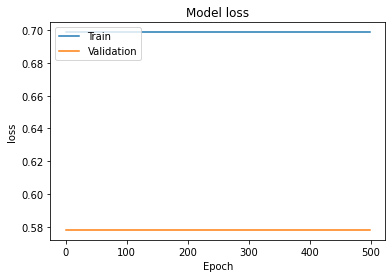

In [60]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
pred = lstm.predict(X_test)

In [52]:
len(pred[pred>0.5])

2299

In [53]:
y_test.sum()

1098

In [54]:
len(y_test)

2299